# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I investigate the TMDb movie dataset. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
> Questions: 
> - Which genres are most popular from year to year? 
> - What kinds of properties are associated with movies that have high revenues?
> - What genre generate the most revenue on average?
> - What genre has the highest budget on average?
> - Which movie has the highest renevue to budget relation?
> - What is the median runtime and how is the runtime distributed?
> - Which genres have the highest user rating?
> - Other statistics

In [858]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

def standardize_data(values):
    standardized_values = (values - values.mean()) / values.std()
    return standardized_values

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [859]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [860]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Find the maximum number of genres to split them in single columns

In [861]:
max(df.genres.str.count('\|'))+1

5.0

### Findings 

- The dataset contains **10866** entries.
- It looks like some columns are unnecassary
- some rows don't have a cast (mostly documentaries)
- some rows don't have a director
- some rows don't have a genre
- some rows have zero runtime, budget or revenue
- maximal 5 genres per movie so it is possible to split them into single columns
- Release date is no datetime, but it looks like I don't need it

### Data Cleaning 

- Convert genre list to single columns categeories (5 columns) -> Fill NaN with "None" category
- Drop unneded columns

In [862]:
df[['genre_1', 'genre_2', 'genre_3','genre_4','genre_5']] = df['genres'].str.split('|', expand=True)
for col in ['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5']:
    df[col] = df[col].fillna('None')
    df[col] = df[col].astype('category')

In [863]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','budget','revenue','genres','cast','director','production_companies','release_date'], axis=1, inplace=True)

In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
genre_1           10866 non-null category
genre_2           10866 non-null category
genre_3           10866 non-null category
genre_4           10866 non-null category
genre_5           10866 non-null category
dtypes: category(5), float64(4), int64(3), object(1)
memory usage: 736.2+ KB


In [865]:
df.describe()

popularity       runtime    vote_count  vote_average  release_year  \
count  10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean       0.646441    102.070863    217.389748      5.974922   2001.322658   
std        1.000185     31.381405    575.619058      0.935142     12.812941   
min        0.000065      0.000000     10.000000      1.500000   1960.000000   
25%        0.207583     90.000000     17.000000      5.400000   1995.000000   
50%        0.383856     99.000000     38.000000      6.000000   2006.000000   
75%        0.713817    111.000000    145.750000      6.600000   2011.000000   
max       32.985763    900.000000   9767.000000      9.200000   2015.000000   

         budget_adj   revenue_adj  
count  1.086600e+04  1.086600e+04  
mean   1.755104e+07  5.136436e+07  
std    3.430616e+07  1.446325e+08  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    2.085325e+07  3.369710e+07  
max    4.250000e+08  2.827124e+09

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

> Create a new dataframe with all genres concatenated in a long list and drop "None" rows

In [866]:
genres_total = pd.concat([df[["release_year","revenue_adj","budget_adj","vote_average","genre_1"]].rename(columns={"genre_1": "genre"}),
                          df[["release_year","revenue_adj","budget_adj","vote_average","genre_2"]].rename(columns={"genre_2": "genre"}),
                          df[["release_year","revenue_adj","budget_adj","vote_average","genre_3"]].rename(columns={"genre_3": "genre"}),
                          df[["release_year","revenue_adj","budget_adj","vote_average","genre_4"]].rename(columns={"genre_4": "genre"}),
                          df[["release_year","revenue_adj","budget_adj","vote_average","genre_5"]].rename(columns={"genre_5": "genre"}),], 
                          ignore_index=True)

genres_total = genres_total[genres_total.genre != "None"]
genres_total.genre = genres_total.genre.astype('category')
genres_unique = genres_total.genre.value_counts()

> Count and plot absolute and relative occurrance of genre grouped by year

In [867]:
genres_count_rel = genres_total.groupby("release_year").genre.value_counts(normalize=True)
genres_count_rel = genres_count_rel.to_frame("count_rel")

genres_count = genres_total.groupby("release_year").genre.value_counts()
genres_count = genres_count.to_frame("count")

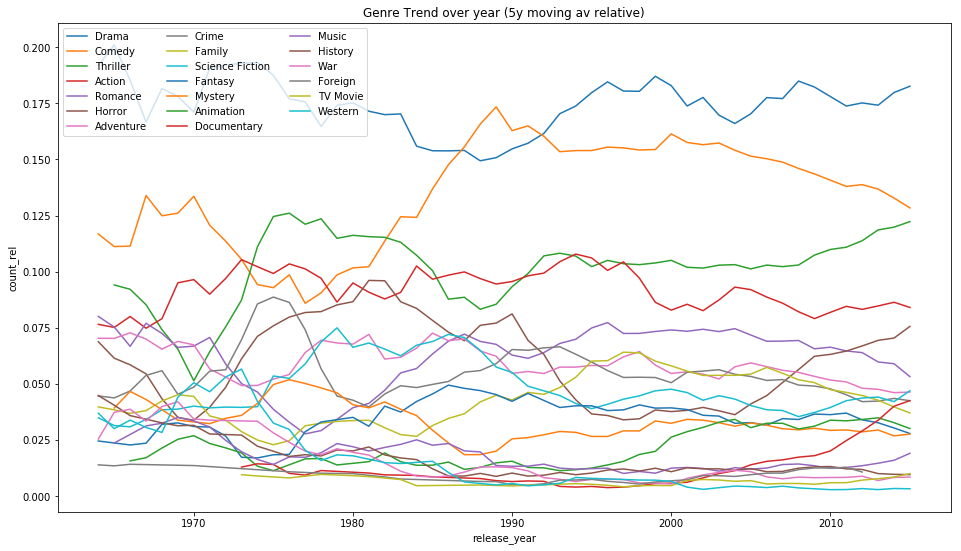

In [868]:
plt.figure(figsize=(16,9))
for genre_i in genres_unique.index:
    y = genres_count_rel.xs(genre_i, level='genre')
    plt.plot(y.index,y.rolling(window=5).mean(),label=genre_i)
plt.legend(ncol=3)
plt.xlabel('release_year')
plt.ylabel('count_rel')
plt.title('Genre Trend over year (5y moving av relative)')
plt.show()

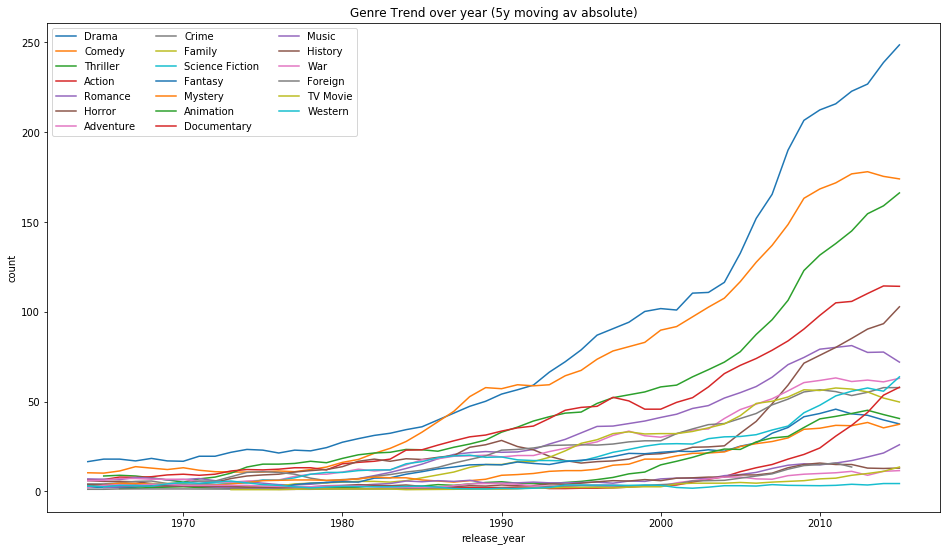

In [869]:
plt.figure(figsize=(16,9))
for genre_i in genres_unique.index:
    y = genres_count.xs(genre_i, level='genre')
    plt.plot(y.index,y.rolling(window=5).mean(),label=genre_i)
plt.legend(ncol=3)
plt.xlabel('release_year')
plt.ylabel('count')
plt.title('Genre Trend over year (5y moving av absolute)')
plt.show()

### What kinds of properties are associated with movies that have high revenues?

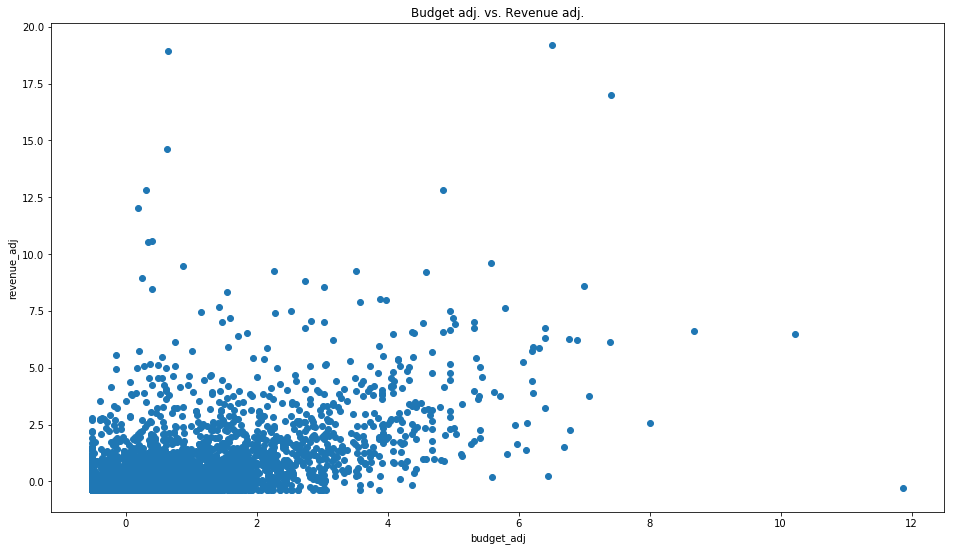

array([[1.        , 0.64660744],
       [0.64660744, 1.        ]])

In [870]:
plt.figure(figsize=(16,9))

plt.scatter(standardize_data(df.budget_adj),standardize_data(df.revenue_adj))
plt.xlabel('budget_adj')
plt.ylabel('revenue_adj')
plt.title('Budget adj. vs. Revenue adj.')
plt.show()
np.corrcoef(standardize_data(df.budget_adj),standardize_data(df.revenue_adj))

### Which genres generate the most revenue on average?

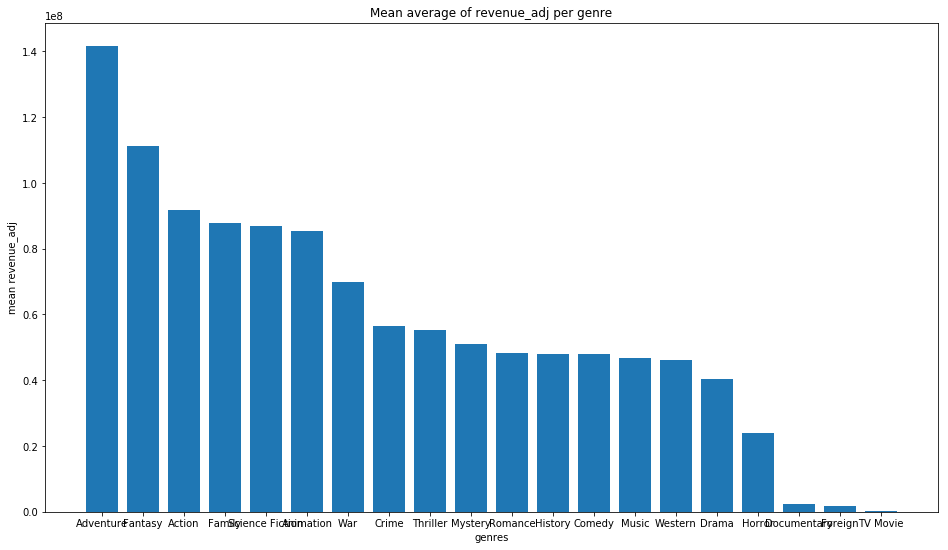

In [871]:
genres_rev_adj = genres_total.groupby("genre").revenue_adj.mean()
genres_rev_adj = genres_rev_adj.to_frame("mean_rev")
genres_rev_adj.sort_values("mean_rev",ascending=False,inplace=True)

plt.figure(figsize=(16,9))
plt.bar(genres_rev_adj.index,genres_rev_adj.mean_rev)
plt.xlabel('genres')
plt.ylabel('mean revenue_adj')
plt.title('Mean average of revenue_adj per genre')
plt.show()

### Which genres are the most expensive on average?

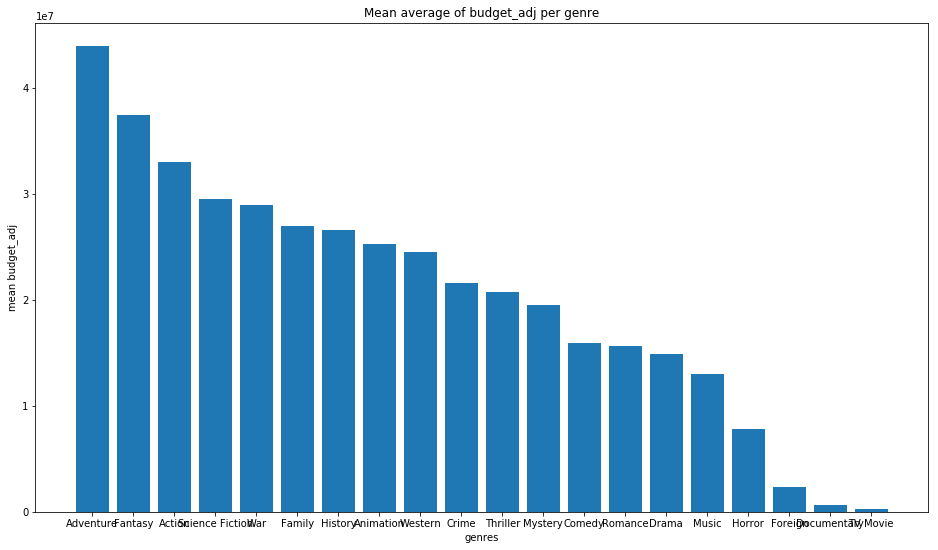

In [872]:
genres_bud_adj = genres_total.groupby("genre").budget_adj.mean()
genres_bud_adj = genres_bud_adj.to_frame("mean_bud")
genres_bud_adj.sort_values("mean_bud",ascending=False,inplace=True)

plt.figure(figsize=(16,9))
plt.bar(genres_bud_adj.index,genres_bud_adj.mean_bud)
plt.xlabel('genres')
plt.ylabel('mean budget_adj')
plt.title('Mean average of budget_adj per genre')
plt.show()

### Which genres have the highest user rating?

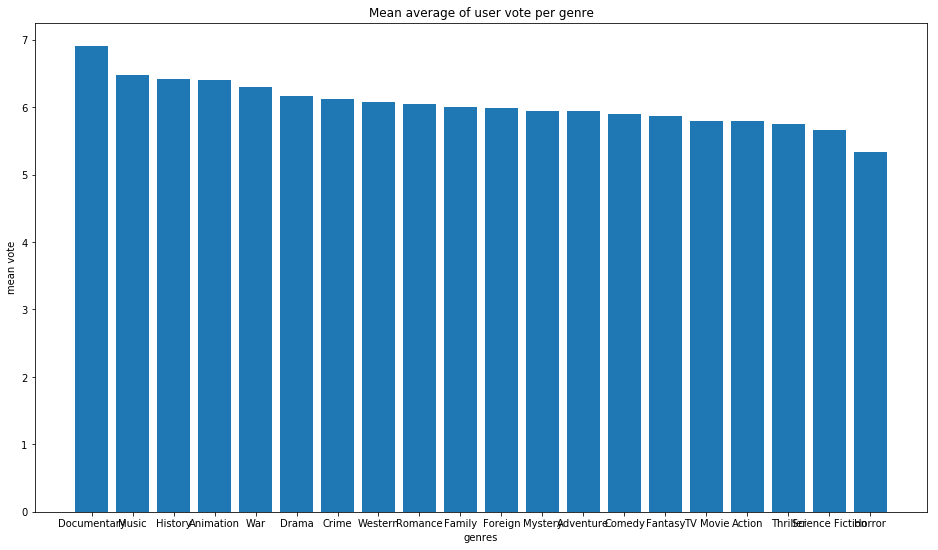

In [873]:
genres_vote = genres_total.groupby("genre").vote_average.mean()
genres_vote = genres_vote.to_frame("mean_vote")
genres_vote.sort_values("mean_vote",ascending=False,inplace=True)

plt.figure(figsize=(16,9))
plt.bar(genres_vote.index,genres_vote.mean_vote)
plt.xlabel('genres')
plt.ylabel('mean vote')
plt.title('Mean average of user vote per genre')
plt.show()

### Which movie has the highest renevue to budget relation?

In [874]:
# at first, delete all rows which have no rev and bud
df_red = df
df_red.drop(df_red[df_red.budget_adj == 0].index, inplace=True)
df_red.drop(df_red[df_red.revenue_adj == 0].index, inplace=True)


df_red['rev_bud_rel'] = df_red.revenue_adj / df_red.budget_adj
df_red.sort_values("rev_bud_rel",ascending=False,inplace=True)
df_red.head(3)

popularity           original_title  runtime  vote_count  vote_average  \
10495    0.772494  The Karate Kid, Part II      113         211           5.8   
6179     0.132713           Into the Night      115          24           6.1   
3608     0.463510       From Prada to Nada      107          47           5.2   

       release_year  budget_adj   revenue_adj    genre_1 genre_2   genre_3  \
10495          1986  224.802924  2.289886e+08  Adventure   Drama    Action   
6179           1985  231.096930  1.358201e+07     Comedy   Drama  Thriller   
3608           2011   90.154018  2.423495e+06     Comedy   Drama   Romance   

       genre_4 genre_5   rev_bud_rel  
10495  Romance  Family  1.018619e+06  
6179      None    None  5.877193e+04  
3608      None    None  2.688172e+04

### What is the median runtime and how is the runtime distributed?

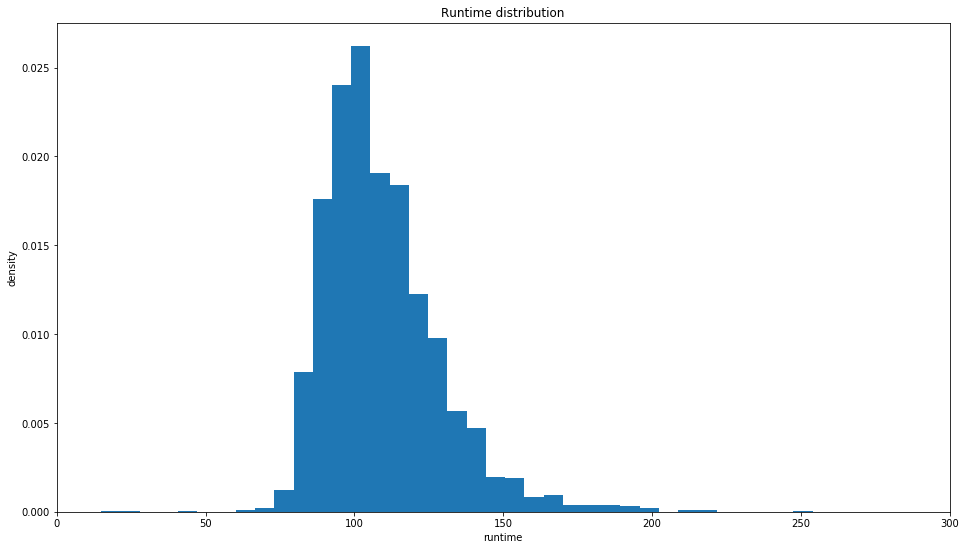

106.0

In [875]:
plt.figure(figsize=(16,9))
plt.hist(df.runtime,bins=50,density=True)
plt.xlabel('runtime')
plt.xlim(0,300)
plt.ylabel('density')
plt.title('Runtime distribution')
plt.show()
np.median(df.runtime)

### Other statistics

In [876]:
df.sort_values("revenue_adj",ascending=False,inplace=True)
df.head(3)

popularity original_title  runtime  vote_count  vote_average  \
1386    9.432768         Avatar      162        8458           7.1   
1329   12.037933      Star Wars      121        4428           7.9   
5231    4.355219        Titanic      194        4654           7.3   

      release_year    budget_adj   revenue_adj    genre_1    genre_2  \
1386          2009  2.408869e+08  2.827124e+09     Action  Adventure   
1329          1977  3.957559e+07  2.789712e+09  Adventure     Action   
5231          1997  2.716921e+08  2.506406e+09      Drama    Romance   

              genre_3          genre_4 genre_5  rev_bud_rel  
1386          Fantasy  Science Fiction    None    11.736312  
1329  Science Fiction             None    None    70.490728  
5231         Thriller             None    None     9.225171

<a id='conclusions'></a>
## Conclusions

- Drama is the most popular genre (absolute and relative) over the years except of 1985-1990 (here was Comedy first)
- Drama is followd by Comedy, Thriller and Action
- Budget_adj and Revenue_adj are positive correlated by 0.64 (took only the adjusted which account for inflation)
- Adventure movies generate the most revenue on average, followed by Fantasy and Action
- Adventure movies have the most budget on average, followed by Fantasy and Action
- "The Karate Kid, Part II" has the highest renevue to budget relation
- The median runtime is 106 minutes
- Documentary movies have the highest user vote on average - Horror the lowest
- "The Story of Film: An Odyssey" has the highest user rating
- "The Warrior's Way" has the highest budget
- "Avatar" has the highest revenue